**Identificação do aluno**

**Email:** lucas.souza@ccc.ufcg.edu.br

**Matrícula:** 121210354

# Análise de Sentimentos em Reviews do IMDb

O principal objetivo desta tarefa é aplicar três modelos de aprendizado de máquina distintos - Regressão Linear, Naive Bayes e Perceptron - para realizar a análise de sentimento em um conjunto de dados de *reviews* de usuários sobre filmes no IMDb. Ao final desta tarefa, você deverá ter uma compreensão mais profunda de como esses modelos funcionam, suas vantagens e limitações quando aplicados a dados textuais do mundo real. Este conjunto de dados inclui avaliações de texto juntamente com rótulos de sentimento correspondentes (positivo ou negativo) para a aprendizagem supervisionada.

## Bibliotecas

In [1]:
# Para a leitura dos dados
import pandas as pd

# Manipulação de texto
import nltk.corpus
from nltk                             import SnowballStemmer
from nltk.tokenize                    import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Prepraração dos dados
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.model_selection          import train_test_split

# Modelos de classificação
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import MultinomialNB

# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucasqueiros/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/lucasqueiros/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Leitura dos dados

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/issilva5/44c9406a85b0fed0d62668752cc31b09/raw/49e01d2e8011bdd83d0bc835a518e398ae319303/movie_reviews.csv')
df.head()

,content,sentiment
0,now i wont deny that when i purchased this off...,neg
1,the saddest thing about this tribute is that a...,neg
2,last night i decided to watch the prequel or s...,neg
3,i have to admit that i liked the first half of...,neg
4,i was not impressed about this film especially...,neg


Os dados estão distribuídos em duas classes:

In [3]:
df.groupby('sentiment').count()

,content
sentiment,
neg,12500
pos,12500


A seguir criaremos uma lista com o texto.

In [4]:
corpus = df['content'].tolist()

## Limpeza dos dados

Antes de aplicar modelos de aprendizado de máquina, você precisará limpar e pré-processar os dados textuais. É esperado que você aplique pelo menos as seguintes tarefas de limpeza dos dados:

- Tokenização
- Remoção de palavras muito pequenas (<= 2) ou muito grandes (>= 15).
- Remoção de stopwords.
- Stemming.

In [16]:
def remove_palavras_pequenas_grandes(tokens):
  palavras_removidas = []
  for token in tokens:
    if len(token) >2 or len(token) <15:
      palavras_removidas.append(token)
  return palavras_removidas

def remove_stopwords(tokens):
  sw = set(nltk.corpus.stopwords.words('english'))
  return [token for token in tokens if token not in sw]

def stemming(tokens):
  stemmer = SnowballStemmer('english')
  return [stemmer.stem(token) for token in tokens]

In [24]:
def process_corpus(corpus):
  corpus_processed = []
  for document in corpus:
    tokens = word_tokenize(document)
    tokens = remove_palavras_pequenas_grandes(tokens)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    corpus_processed.append(" ".join(tokens))
  return corpus_processed

corpus_processed = process_corpus(corpus)

In [26]:
print('Texto original:', corpus[44])
print()
print('Texto processado:', corpus_processed[44])
print("-" * 30)
print('Texto original:', corpus[157])
print()
print('Texto processado:', corpus_processed[157])

Texto original: i dont have much to say about this movie it could have been a wonderful tourdeforce for peter sellers but it is one of the most tragic misfires in movie history that it was sellers final movie makes it all the more painfulbr br the terrible screenplay direction and shockingly wooden performances all come dreadfully together to make this one of the most unwatchably awful movies ever madebr br i wish so much that i could find even a snicker or a chuckle buried somewhere in this pile of putrid blubber but its a lifeless humorless disaster the truth hurtsbr br peter why couldnt you have stopped at being there

Texto processado: dont much say movi could wonder tourdeforc peter seller one tragic misfir movi histori seller final movi make painfulbr br terribl screenplay direct shock wooden perform come dread togeth make one unwatch aw movi ever madebr br wish much could find even snicker chuckl buri somewher pile putrid blubber lifeless humorless disast truth hurtsbr br peter 

## Preparando os dados para os modelos

Primeiramente, realize a vetorização TF-IDF dos dados.

In [27]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_processed)
y = df['sentiment'].to_numpy()

Agora, realize a partição treino e teste dos dados.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

## Treinando modelos

Finalmente, instancie e treine os três modelos (Regressão Logística, Naive Bayes e Perceptron).

In [30]:
clr = LogisticRegression(random_state=0).fit(X_train, y_train)
cnb = MultinomialNB().fit(X_train, y_train)
cp = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
cp.fit(X_train, y_train)

Perceptron()

## Avaliação dos modelos

Você deve realizar as predições para cada um dos três modelos.

In [33]:
print(clr.predict(X_test)[:10])
print()
print(cnb.predict(X_test)[:10])
print()
print(cp.predict(X_test)[:10])

['pos' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos']

['neg' 'neg' 'neg' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos']

['pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'neg' 'pos']


Plote a matriz de confusão para cada modelo.

In [66]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name, labels=None) -> None:
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(len(labels), len(labels)))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=sns.cubehelix_palette(as_cmap=True),
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.xlabel('Predito')
    plt.ylabel('Atual')
    plt.title('Matriz de confusão ' + model_name)
    plt.show()

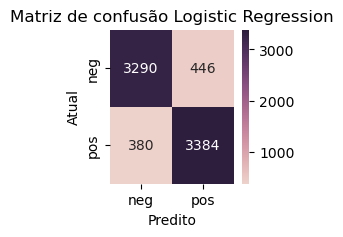

In [67]:
plot_confusion_matrix(y_test, clr.predict(X_test), "Logistic Regression", labels=['neg', 'pos'])

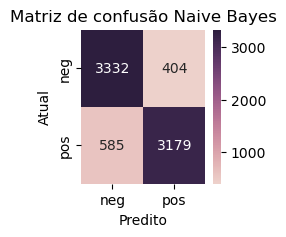

In [68]:
plot_confusion_matrix(y_test, cnb.predict(X_test), "Naive Bayes", labels=['neg', 'pos'])

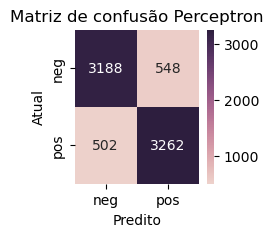

In [69]:
plot_confusion_matrix(y_test, cp.predict(X_test), "Perceptron", labels=['neg', 'pos'])

Calcule métricas (acurácia, recall, precision, f1-score) para cada uma das predições.

In [76]:
print(f"{'Métricas do modelo Logistic Regression':^70}")
print(classification_report(y_test, clr.predict(X_test)))
print("-" * 70)
print(f"{'Métricas do modelo Naive Bayes':^70}")
print(classification_report(y_test, cnb.predict(X_test)))
print("-" * 70)
print(f"{'Métricas do modelo Perceptron':^70}")
print(classification_report(y_test, cp.predict(X_test)))

                Métricas do modelo Logistic Regression                
              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      3736
         pos       0.88      0.90      0.89      3764

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

----------------------------------------------------------------------
                    Métricas do modelo Naive Bayes                    
              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      3736
         pos       0.89      0.84      0.87      3764

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

----------------------------------------------------------------------
                    Métricas do modelo Perceptron             

#### Perguntas

***Discuta sobre os resultados do modelo considerando as matrizes de confusão e as métricas calculadas.***

#### Resposta:
A partir dos dados obtidos acima, podemos afirmar que os três modelos obtiveram uma perfomance bem próxima, perto de 88% de acurácia. Mas se quisermos ser mais precisos quanto a isso podemos rankear os modelos em:  
- Regressão Logística - 89%
- Naive Bayes - 87%
- Perceptron - 86%


## Interpretando os modelos

Uma subárea importante da aprendizagem de máquina é a interpretação dos modelos.

Nesta parte do laboratório, você deve implementar funções para facilitar a interpretação dos modelos treinados e responder algumas perguntas sobre eles.

### Implementando funções auxiliares

A seguir é pedido que você implemente duas funções.

A primeira delas **recupera_palavras_positivas** deve retornar as top-20 palavras que mais contribuem para a classificação do texto como positivo. A segunda **recupera_palavras_negativas** deve fazer o equivalente para a classificação negativa.

Os modelos de Regressão Logística e Perceptron tem um parâmetro chamado ***coef_*** este parâmetro retorna o peso de cada feature (palavra) tem no modelo. Palavras com peso positivo influenciam para a classificação positiva, e palavras com peso negativo fazem o inverso. O valor desse parâmetro tem a dimensão (1, n_features).

Já o modelo Naive Bayes tem um parâmetro chamado ***feature_log_prob_***. Este parâmetro retorna o log das probabilidades de cada palavra aparecer no texto dada uma classe. O valor desse parâmetro tem a dimensão (2, n_features), de modo que a posição 0 corresponde as probabilidades para a classe negativa e a posição para a classe positiva. Quanto maior for a probabilidade de uma palavra, maior podemos dizer que é sua influência na classificação.

Para acessar o nomes das features em ordem utilize o método **get_feature_names_out** do vetorizador construído.

Ambas as funções devem retornar uma lista de tuplas (string, float), ou seja, (palavra, peso).

In [90]:
def recupera_palavras_positivas(modelo):
  # Para o modelo Naive Bayes
  if modelo == cnb:
    # Log das probabilidades positivas
    log_probs = modelo.feature_log_prob_[1]
    
    # Obtendo o nome das palavras
    palavras = vectorizer.get_feature_names_out()

    # Criar a lista de tuplas (palavra, probabilidade)
    palavras_positivas = [(palavras[i], log_probs[i]) for i in range(len(log_probs))]

    # Ordena pela probabilidade, em ordem decrescente
    palavras_positivas.sort(key=lambda x: x[1], reverse=True)

    return palavras_positivas[:20]
  
  # Para os modelos Logistic Regression e Perceptron
  else:
    # Reduzindo a dimensionalidade do array
    pesos = modelo.coef_.flatten()

    # Obtendo o nome das palavras
    palavras = vectorizer.get_feature_names_out()  

    # Criar a lista de tuplas (palavra, probabilidade)
    palavras_positivas = [(palavras[i], pesos[i]) for i in range(len(pesos)) if pesos[i] > 0]

    # Ordena por peso decrescente
    palavras_positivas.sort(key=lambda x: x[1], reverse=True)

    return palavras_positivas[:20]

def recupera_palavras_negativas(modelo):
  # Para o modelo Naive Bayes
  if modelo == cnb:
    # Log das probabilidades positivas
    log_probs = modelo.feature_log_prob_[0]
    
    # Obtendo o nome das palavras
    palavras = vectorizer.get_feature_names_out()

    # Criar a lista de tuplas (palavra, probabilidade)
    palavras_positivas = [(palavras[i], log_probs[i]) for i in range(len(log_probs))]

    # Ordena pela probabilidade, em ordem decrescente
    palavras_positivas.sort(key=lambda x: x[1], reverse=True)

    return palavras_positivas[:20]
  
  # Para os modelos Logistic Regression e Perceptron
  else:
    # Reduzindo a dimensionalidade do array
    pesos = modelo.coef_.flatten()

    # Obtendo o nome das palavras
    palavras = vectorizer.get_feature_names_out()  

    # Criar a lista de tuplas (palavra, probabilidade)
    palavras_positivas = [(palavras[i], pesos[i]) for i in range(len(pesos)) if pesos[i] > 0]

    # Ordena por peso decrescente
    palavras_positivas.sort(key=lambda x: x[1])
    
    return palavras_positivas[:20]

In [112]:
recupera_palavras_positivas(cnb)

[('br', -5.9337295109667325),
 ('movi', -5.96396320785731),
 ('film', -5.987430344680673),
 ('one', -6.521276084142129),
 ('like', -6.71157079435481),
 ('great', -6.745701103069822),
 ('good', -6.8082655553095055),
 ('stori', -6.814212405674386),
 ('love', -6.825889584619905),
 ('time', -6.838883984306898),
 ('see', -6.85348494267758),
 ('watch', -6.868471158114296),
 ('charact', -6.9307156206265494),
 ('show', -6.941929452992792),
 ('well', -7.000490876566611),
 ('realli', -7.029740903341053),
 ('make', -7.055875084859367),
 ('get', -7.05785048633528),
 ('also', -7.10432421928492),
 ('best', -7.1104991741171615)]

In [113]:
recupera_palavras_negativas(cnb)

[('movi', -5.73268507922315),
 ('br', -5.824879355280296),
 ('film', -6.055145279808916),
 ('bad', -6.5140141029302745),
 ('one', -6.522902352088036),
 ('like', -6.5431299382438555),
 ('watch', -6.745101948410125),
 ('even', -6.773663053161059),
 ('make', -6.809161042590569),
 ('good', -6.8191172418672785),
 ('get', -6.8504626608757215),
 ('would', -6.856259341857839),
 ('time', -6.8749651540309955),
 ('charact', -6.899858234924469),
 ('realli', -6.903967472837122),
 ('act', -6.941765666044195),
 ('see', -6.9576550182975865),
 ('dont', -6.9664983325024386),
 ('look', -7.024236056420831),
 ('stori', -7.039034808826577)]

### Visualizando e interpretando

Use a função abaixo para visualizar uma nuvem de palavras do retorno das funções.

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(lista_de_tuplas):
    # Cria um dicionário a partir da lista de tuplas
    palavra_freq = {t[0]: t[1] for t in lista_de_tuplas}

    # Cria a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palavra_freq)

    # Plota a WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#### Palavras positivas

Nuvem de palavras positivas do modelo Logistic Regression


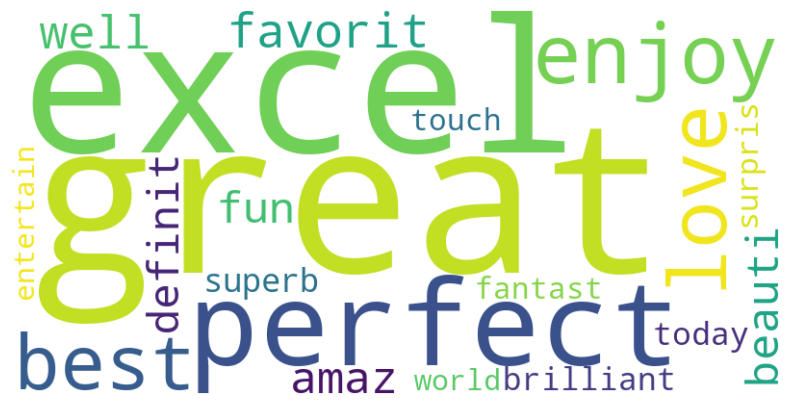

In [106]:
print("Nuvem de palavras positivas do modelo Logistic Regression")
plot_wordcloud(recupera_palavras_positivas(clr))

Nuvem de palavras positivas do modelo Naive Bayes


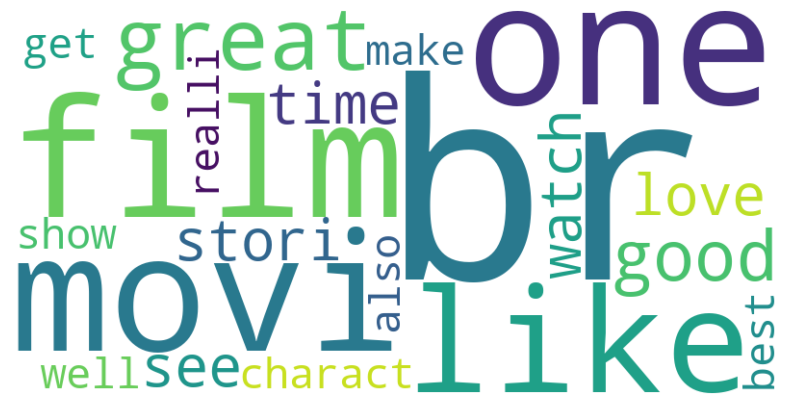

In [107]:
print("Nuvem de palavras positivas do modelo Naive Bayes")
plot_wordcloud(recupera_palavras_positivas(cnb))

Nuvem de palavras positivas do modelo Perceptron


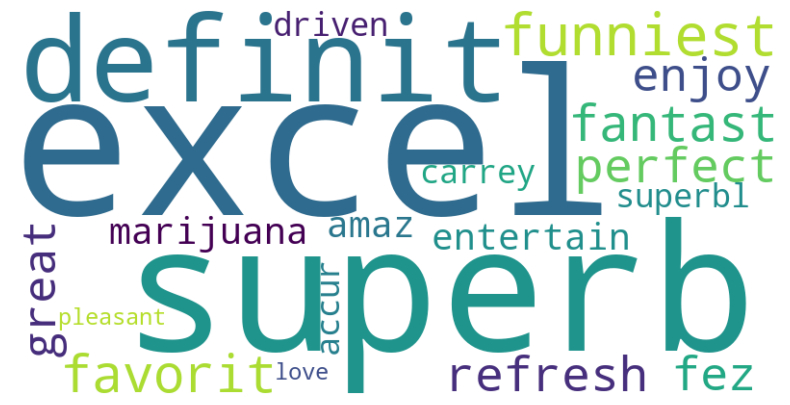

In [108]:
print("Nuvem de palavras positivas do modelo Perceptron")
plot_wordcloud(recupera_palavras_positivas(cp))

#### Palavras negativas

Nuvem de palavras negativas do modelo Logistic Regression


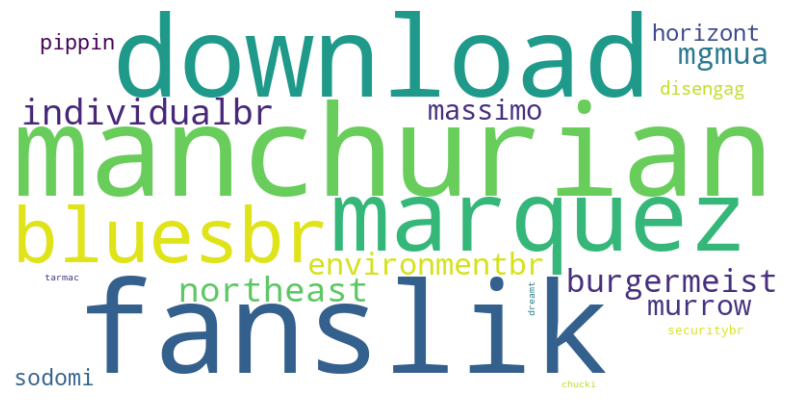

In [109]:
print("Nuvem de palavras negativas do modelo Logistic Regression")
plot_wordcloud(recupera_palavras_negativas(clr))

Nuvem de palavras negativas do modelo Naive Bayes


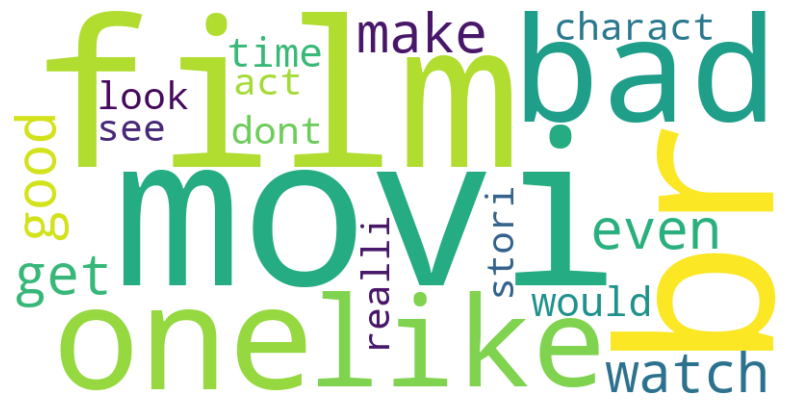

In [110]:
print("Nuvem de palavras negativas do modelo Naive Bayes")
plot_wordcloud(recupera_palavras_negativas(cnb))

Nuvem de palavras negativas do modelo Perceptron


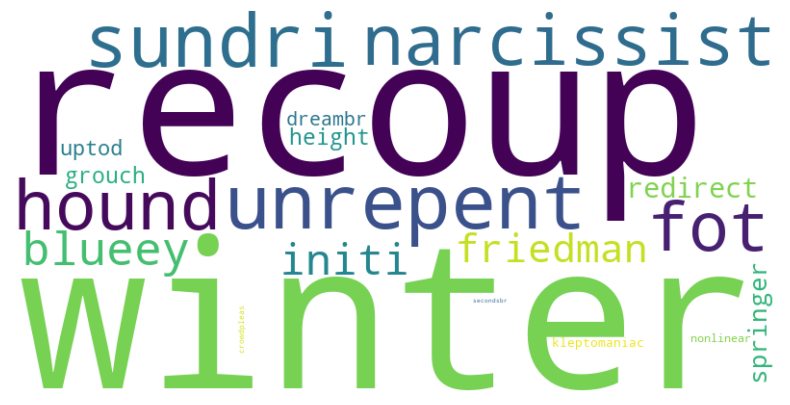

In [111]:
print("Nuvem de palavras negativas do modelo Perceptron")
plot_wordcloud(recupera_palavras_negativas(cp))

#### Perguntas

**1. Analisando as nuvens de palavras positivas de cada modelo, é possível identificar que as palavras estão associadas à um sentimento positivo? Dê exemplos.**

Sim, pegando uma palavra de cada nuvem de palavras temos "excel", "like" e "great" que claramente remetem a palavras de sentimentos positivos.

**2. Analisando as nuvens de palavras negativas de cada modelo, é possível identificar que as palavras estão associadas à um sentimento negativo? Dê exemplos.**

Não, se tratando das palavras relacionadas a sentimentos negativos tivemos uma contradição. Por mais que as métricas mostrem que os modelos tem uma boa acurácia, algumas nuvens de palavras não possuem nenhuma palavra claramente relacionada aos sentimentos em questão, como por exemplo no modelo de regressão logística tivemos a palavra "Marquez" que pode ser um nome próprio. No modelo de Perceptron tivemos "winter" que semânticamente não tem relação com sentimentos negativos tambem. A única palavra que realmente tem um bom relacionamento apareceu no modelo Naive Bayes que é a palavra "bad".


**3. Considerando as métricas calculadas e a análise acima, qual modelo você acredita ser o melhor na tarefa? Por quê?**

Tendo em vista que em questão de acurácia todos os 3 modelos tiveram valores bem próximos, o diferencial para a escolha de um melhor seria a análise das nuvens de palavras, onde todos os modelos tiveram um desempenho a desejar nas palavras de sentimentos negativos com uma pequena vantagem para o modelo **Naive Bayes** sendo esse o escolhido.


## Testando mais modelos

Até então no exerício utilizamos três modelos de classificação, entretanto existem muitos outros disponíveis no sklearn. Escolha um dos três modelos para treinar e avaliar nos dados. Em seguida compare os resultados com os modelos anteriores.

- [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
- [Decision Tree](https://scikit-learn.org/stable/modules/tree.html#classification)
- [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html#classification)

In [114]:
from sklearn.svm import SVC

In [121]:
csvc = SVC(kernel='linear', C=0.8)
csvc.fit(X_train, y_train)

SVC(C=0.8, kernel='linear')

In [125]:
results = csvc.predict(X_test)
results[:10]

array(['pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos'], dtype=object)

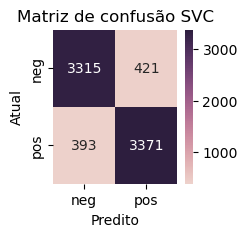

                    Métricas do modelo Perceptron                     
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      3736
         pos       0.89      0.90      0.89      3764

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500



In [127]:
plot_confusion_matrix(y_test, results, "SVC", labels=['neg', 'pos'])

print(f"{'Métricas do modelo Perceptron':^70}")
print(classification_report(y_test, results))

### Perguntas

**1. Explique brevemente como o modelo que você escolheu funciona (a documentação do sklearn pode servir de fonte para esta resposta).**

**Support Vector Machine (SVM)** é um algoritmo de aprendizado supervisionado particularmente eficaz com problemas de classificação binária. A principal idéia por trás do SVM é encontrar um hiperplano que melhor separa as classes de dados em um espaço de alta dimensionalidade. 
Durante a o treinamento o modelo busca o hiperplano de maior margem, ou seja, aquele que maximiza a distancia entre as duas classes mais proximas. Esses são os chamados *vetores de suporte*.  
Dentre as 3 opções o SVM é a mais recomendada pela sua capacidade de lidar com alta dimensionalidade, o que é comum em problemas de PLN.



**2. Como foi o desempenho do modelo escolhido em relação aos demais modelos?**

De acordo com as métricas usadas e a matriz de confusão podemos afirmar que o modelo SVC foi ligeiramente melhor que o modelo de regressão logística que até então tinha obtido o melhor resultado. Mas com certa margem de erro, podemos dizer que todos os modelos obtiveram a mesma porcentagem de acurácia.
